# Librarys

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


np.random.seed(13)


# Data for example

In [83]:
df = pd.read_csv("data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

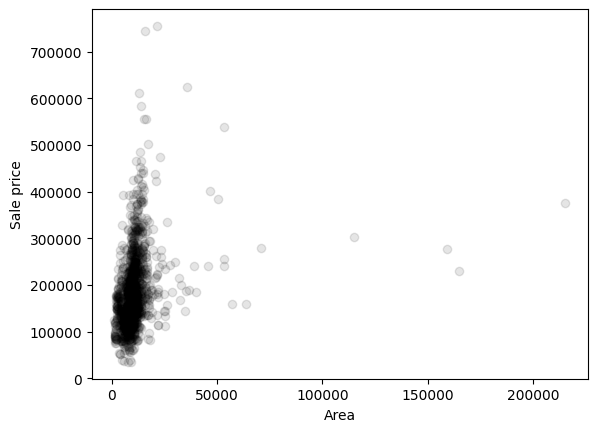

In [85]:
plt.scatter(df["LotArea"], df["SalePrice"], color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()

# Linear Regression

f_wb = w * x[i] + b

In [86]:
np.zeros(df["LotArea"].shape)

array([0., 0., 0., ..., 0., 0., 0.])

In [87]:
def calculate_model_output(w, b, x):
    f_wb = np.zeros(x.shape)
    for i in range (len(x)):
        f_wb[i] = w * x[i] + b

    return f_wb

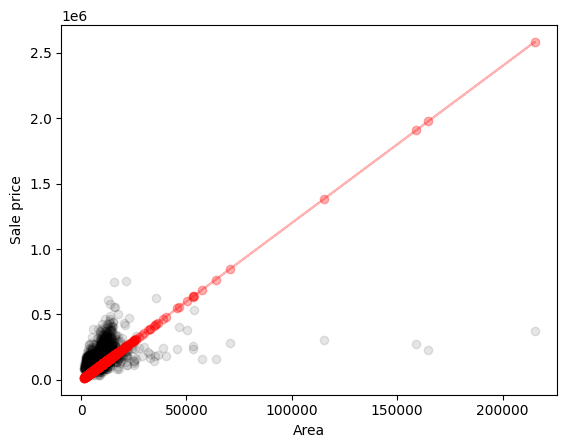

In [88]:
len(df)

outputs = calculate_model_output(12, -220, df["LotArea"])

plt.scatter(df["LotArea"], df["SalePrice"], color="black", alpha=0.1)
plt.plot(df["LotArea"], outputs, color="red", marker="o", alpha=0.3)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()


# Cost function

J(w, b) = 1/(2m) * SUM(y'(i) - y(i))^2


In [89]:
def cost_function(w, b, x, y):
    """
    Computes the cost for linear regression

    Args:
        w (scalar):             parameter of the model
        b (scalar):             parameter of the model
        x (ndarray): Shape (m,) variable
        y (ndarray): Shape (m,) target

    Returns:
        cost (scalar): 1/(2*m) * SUM(y(i) - x(i))^2
    """
    
    
    predict = calculate_model_output(w, b, x)
    m = len(x)
    cost_i = 0
    for i in range (len(x)):
        cost_i += (y[i] - predict[i])**2

    return (1/(2*m)) * cost_i

In [90]:
cost_function(10, 200, df["LotArea"], df["SalePrice"])

8894708678.718493

One variable changes, another remains constant

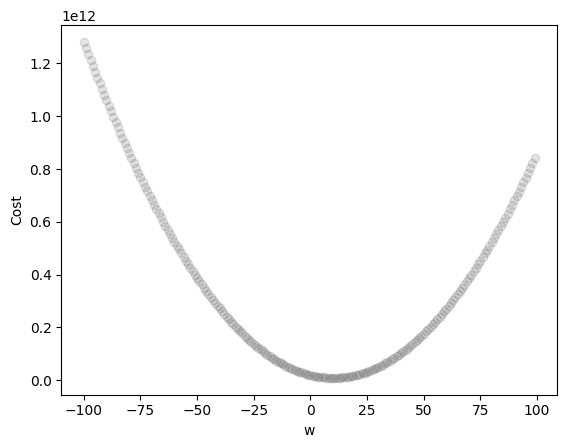

In [91]:
for i in range(-100, 100):
    cost = cost_function(i, 200, df["LotArea"], df["SalePrice"])
    plt.scatter(i, cost, color="black", alpha=0.1)


plt.ylabel('Cost')
plt.xlabel('w')
plt.show()

Both variables change

In [92]:
w_i = []
b_i = []
costs = []

for i in range(-25, 50):
    for j in range(-25, 50):
        w_i.append(i)
        b_i.append(j)
        cost = cost_function(i, j, df["LotArea"], df["SalePrice"])
        costs.append(cost)

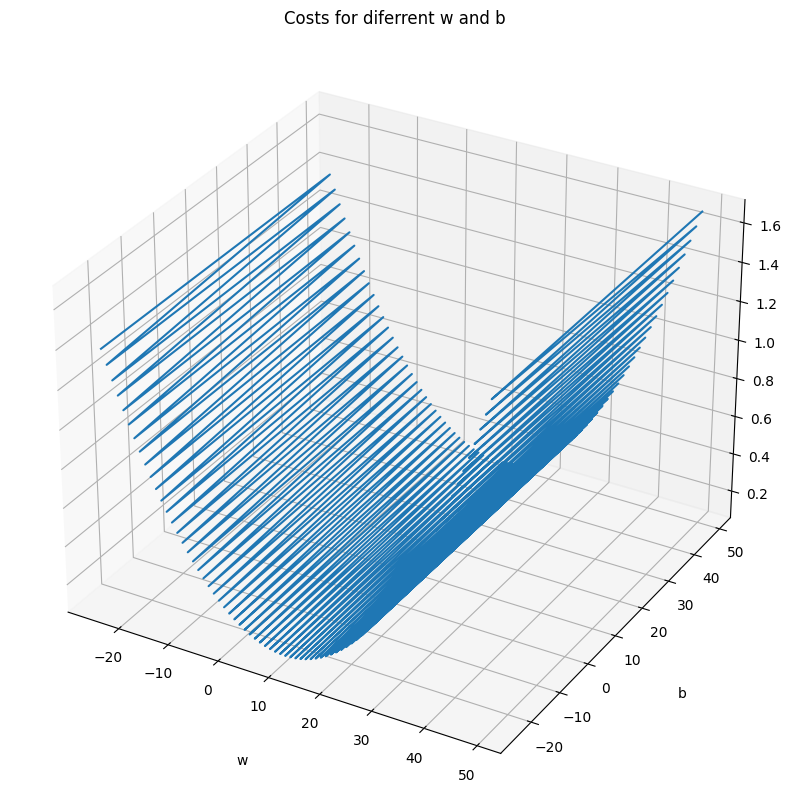

In [93]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot3D(w_i, b_i, costs)

ax.set_xlabel('w', labelpad=20)
ax.set_ylabel('b', labelpad=20)
ax.set_zlabel('cost', labelpad=20)

ax.set_title('Costs for diferrent w and b')
plt.show()

# Gradient Descent

In [94]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient using formula

    Args:
        x (_type_): _description_
        y (_type_): _description_
        w (_type_): _description_
        b (_type_): _description_

    Returns:
        _type_: _description_
    """
    
    m = len(x)
    j_wb_der_w = 0
    j_wb_der_b = 0

    # Calculate the sum from the formula
    for i in range(m):
        f_wb_i = w * x[i] + b
        
        # Sum of partial derivatives of cost for this example
        j_wb_der_w += (f_wb_i - y[i]) * x[i]
        j_wb_der_b += (f_wb_i - y[i])

    j_wb_der_w = (1/m) * j_wb_der_w
    j_wb_der_b = (1/m) * j_wb_der_b
    
    return j_wb_der_w, j_wb_der_b


def gradient_descent(x, y, lr=0.0000001, thold=1e-6, iterations=100):
    w = np.random.rand()
    b = np.random.rand()

    temp_w = 0
    temp_b = 0
    current_cost = float('inf')
    previous_cost = None
    w_history = []
    b_history = []
    costs_history = []
    it = 0
    
    while it < iterations:
        j_wb_der_w, j_wb_der_b = compute_gradient(x, y, w, b)
        temp_w = w - lr * j_wb_der_w
        temp_b = b - lr * j_wb_der_b
        
        current_cost = cost_function(w, b, x, y) 
        
        if previous_cost and abs(previous_cost-current_cost)<=thold:
            break
        
        previous_cost = current_cost
        
        w_history.append(temp_w)
        b_history.append(temp_b)
        costs_history.append(current_cost)
        
        w = temp_w
        b = temp_b
        
        it += 1
        
        # Printing the parameters for every 100th iteration
        if it % 100 == 0:
            print(f"Iteration {it}: Cost {current_cost}, Weight {w}, Bias {b}")
    
    return w, b, w_history, b_history, costs_history


def plot_gradient_descent(w_history, b_history, costs_history):
    # Plot
    plt.figure(figsize=(10,10))
    plt.plot(w_history, costs_history)
    plt.scatter(w_history, costs_history, marker='o', color='red')
    plt.xlabel('w', labelpad=20)
    plt.ylabel('cost', labelpad=20)
    plt.title('costs_history for different w')
    plt.show()
    
    iterations_array = np.arange(1, len(costs_history) + 1)
    # Plot
    plt.figure(figsize=(10,10))
    plt.plot(iterations_array, costs_history)
    plt.scatter(iterations_array, costs_history, marker='o', color='red')
    plt.xlabel('iterations', labelpad=20)
    plt.ylabel('cost', labelpad=20)
    plt.title('costs_history by iterations')
    plt.show()
    
    
    # Plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot3D(w_history, b_history, costs_history)
    ax.scatter(w_history, b_history, costs_history, color='red')  # Adicione scatter em 3D
    ax.plot
    ax.set_xlabel('w', labelpad=20)
    ax.set_ylabel('b', labelpad=20)
    ax.set_zlabel('cost', labelpad=20)
    ax.set_title('Costs for different w and b')
    plt.show()

Iteration 100: Cost 8909574527.243326, Weight 10.048398358653712, Bias 0.24552950929622883
Iteration 200: Cost 8909573961.082361, Weight 10.048397982647206, Bias 0.25305387635141857
Iteration 300: Cost 8909573394.921385, Weight 10.048397606114742, Bias 0.26057824305013794
Iteration 400: Cost 8909572828.760519, Weight 10.048397229582298, Bias 0.2681026093924133
Iteration 500: Cost 8909572262.59966, Weight 10.048396853049871, Bias 0.27562697537824477
Iteration 600: Cost 8909571696.43889, Weight 10.048396476517462, Bias 0.28315134100763234
Iteration 700: Cost 8909571130.27814, Weight 10.048396099985071, Bias 0.2906757062805761
Iteration 800: Cost 8909570564.117476, Weight 10.048395723452698, Bias 0.29820007119707587
Iteration 900: Cost 8909569997.956844, Weight 10.04839534692034, Bias 0.3057244357571318
Iteration 1000: Cost 8909569431.796255, Weight 10.048394970388003, Bias 0.31324879996074395
Iteration 1100: Cost 8909568865.635763, Weight 10.048394593855683, Bias 0.3207731638079122
Itera

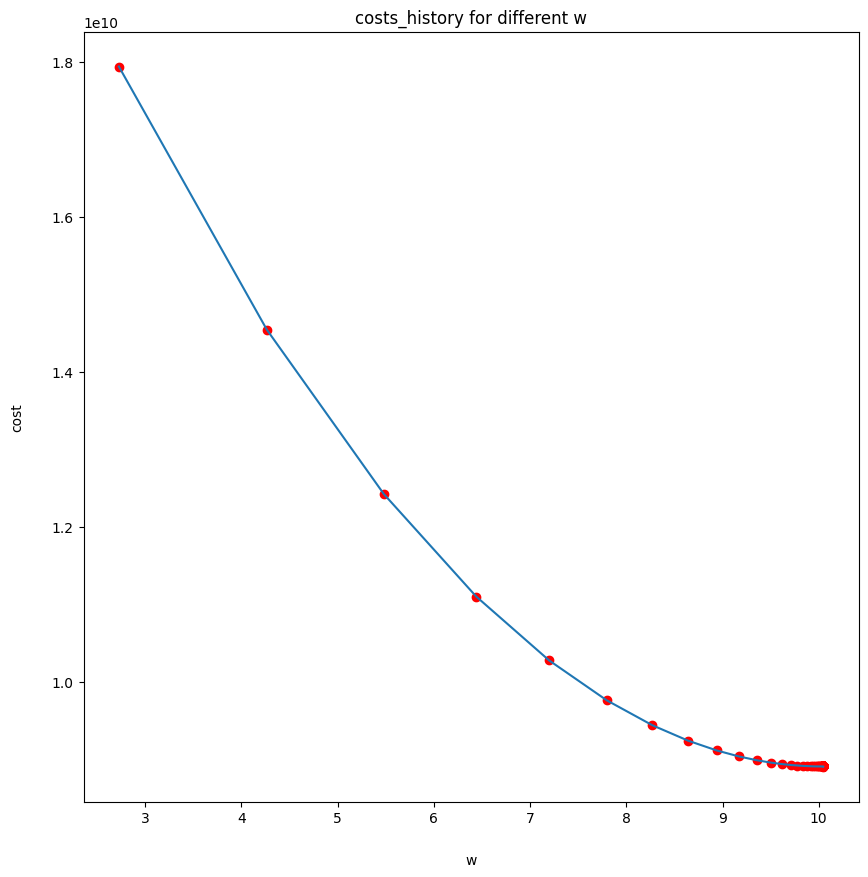

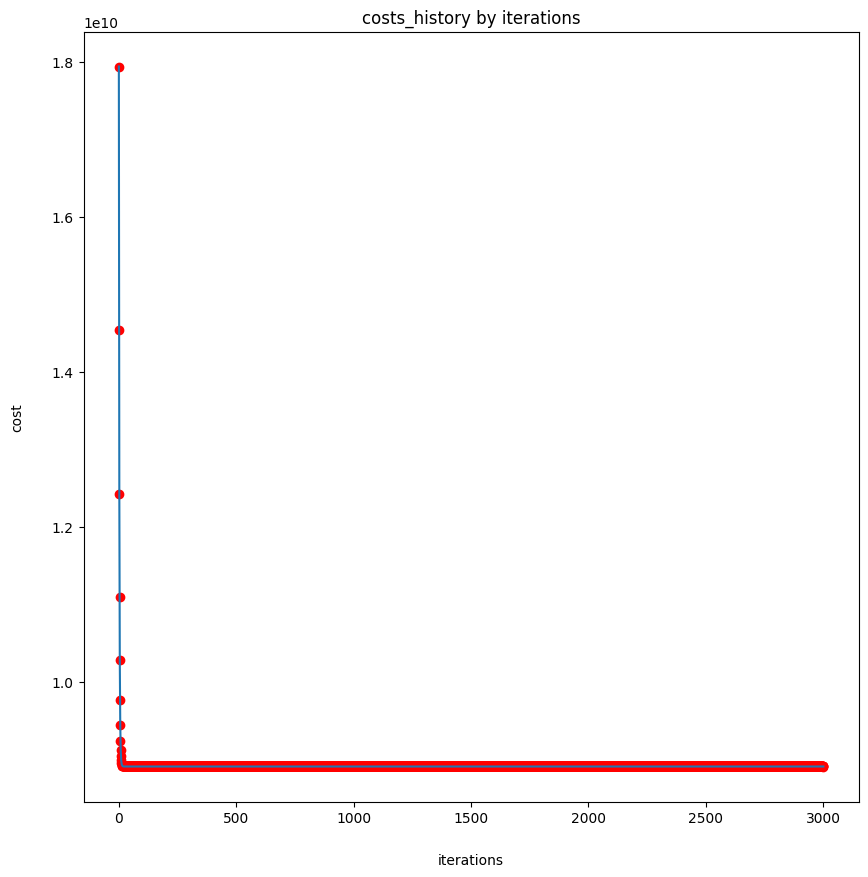

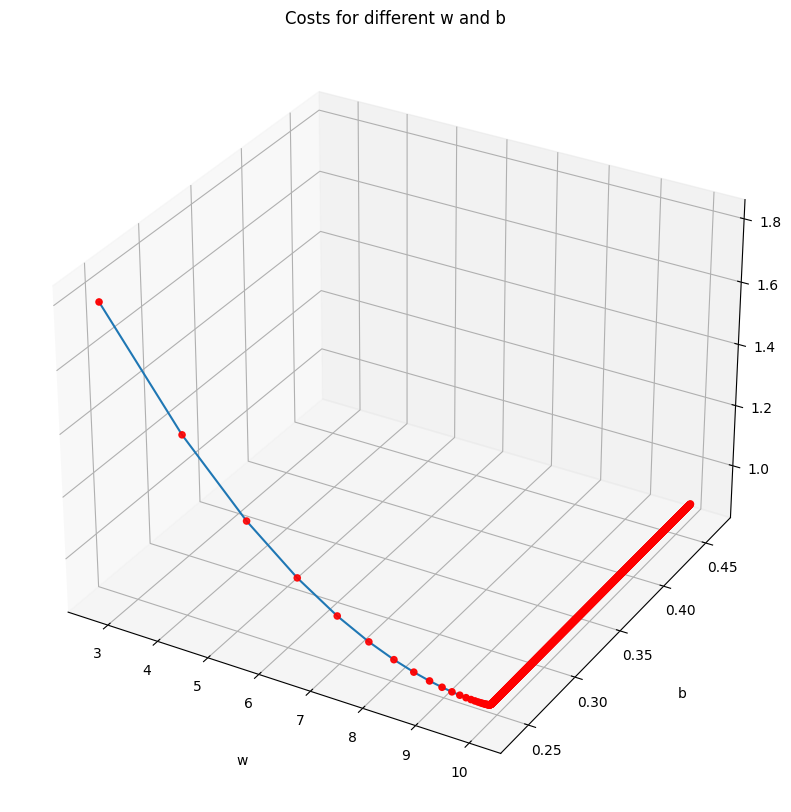

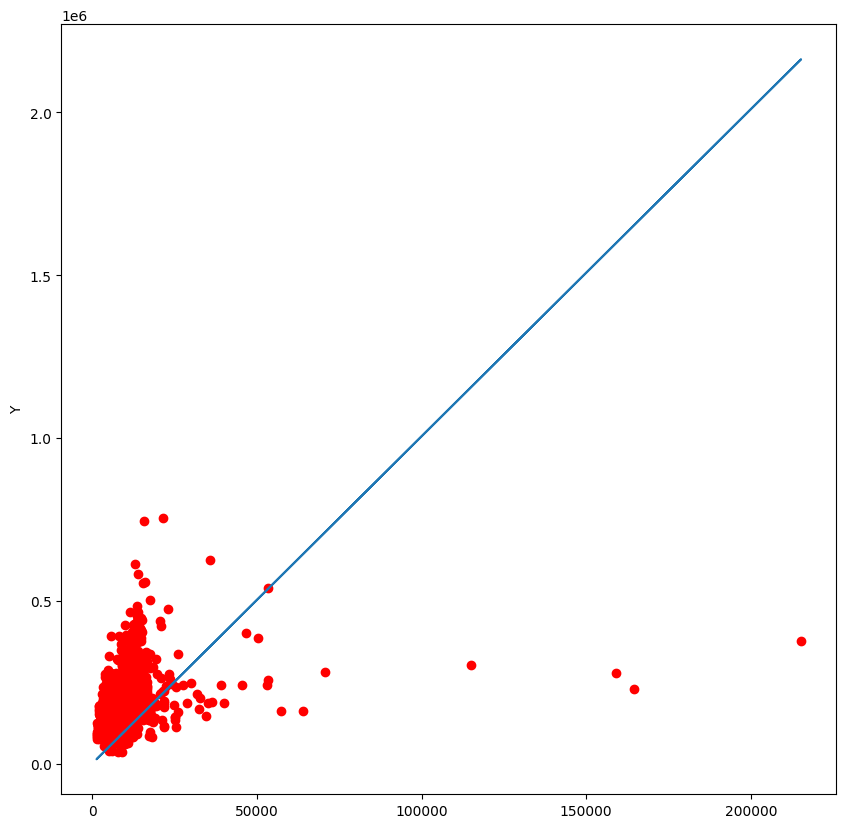

In [95]:
X = df["LotArea"]
Y =  df['SalePrice']

# Test our algorithm
w, b, w_history, b_history, costs_history = gradient_descent(x = X, y = Y, lr = 0.000000001, iterations=3000)

plot_gradient_descent(w_history, b_history, costs_history)


y_calculated = calculate_model_output(w, b, X)


fig = plt.figure(figsize=(10,10))

plt.plot(X, y_calculated)
plt.scatter(X, Y, color='red')
plt.ylabel('Y')

plt.show()

Our algorithm works for fitting a relationship between 2 variables.

# Vectorization

Andrew Ng in his ML Course recommends using vectorization to accelerate calculation on code. So we will be implementing this 

In [96]:
def calculate_model_output(w, b, x):
    f_wb = np.dot(x, w) + b  # Vectorized
    return f_wb


def cost_function(w, b, x, y):
    """
    Computes the cost for linear regression

    Args:
        w (scalar):             parameter of the model
        b (scalar):             parameter of the model
        x (ndarray): Shape (m,) variable
        y (ndarray): Shape (m,) target

    Returns:
        cost (scalar): 1/(2*m) * SUM(y(i) - x(i))^2
    """
    
    predict = calculate_model_output(w, b, x)
    m = len(x)
    cost = np.sum((y - predict)**2)  / (2*m) # Vectorized
    
    return  cost


def compute_gradient(x, y, w, b):
    """
    Computes the gradient using formula

    Args:
        x (ndarray): Shape (m,) variable
        y (ndarray): Shape (m,) target
        w (scalar): Parameter of the model
        b (scalar): Parameter of the model

    Returns:
        j_wb_der_w (scalar): Partial derivative of cost with respect to w
        j_wb_der_b (scalar): Partial derivative of cost with respect to b
    """
    
    m = len(x)
    f_wb = calculate_model_output(w, b, x)
    j_wb_der_w = np.sum((f_wb - y) * x)
    j_wb_der_b = np.sum(f_wb - y)

    j_wb_der_w *= (1 / m)
    j_wb_der_b *= (1 / m)
    
    return j_wb_der_w, j_wb_der_b

# Multiple Linear Regression

In [132]:
def calculate_model_output_multiple(w, b, x):
    """
    Computes the model output for multiple linear regression

    Args:
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features

    Returns:
        f_wb (ndarray): Shape (m,) model output for each sample
    """
    f_wb = np.dot(x, w) + b
    return f_wb


def compute_gradient_multiple(x, y, w, b):
    """
    Computes the gradient using formula

    Args:
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features
        y (ndarray): Shape (m,) target
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model

    Returns:
        j_wb_der_w (ndarray): Partial derivative of cost with respect to w, shape (n,)
        j_wb_der_b (scalar): Partial derivative of cost with respect to b
    """
    
    m = len(x)
    f_wb = calculate_model_output_multiple(w, b, x)
    j_wb_der_w = np.dot((f_wb - y), x)
    j_wb_der_b = np.sum(f_wb - y)
    
    j_wb_der_w = np.multiply(j_wb_der_w, 1/m)
    j_wb_der_b *= (1 / m)
    
    
    return j_wb_der_w, j_wb_der_b


def multiple_linear_regression(x, y, lr=0.00000001, thold=1e-2, iterations=1000):
    w = [np.random.randint(-100, 1000) for _ in X.columns]
    b = np.random.randint(-100, 1000)
    
    number_variables = len(X.columns)
    temp_w = np.zeros(number_variables)
    temp_b = 0
    w_history = []
    b_history = []
    costs_history = []  # current cost = costs_history[-1] / last cost = costs_history[-2]
    it = 0
    
    while it < iterations:
        j_wb_der_w, j_wb_der_b = compute_gradient_multiple(x, y, w, b)
        temp_w = w - lr * j_wb_der_w
        temp_b = b - lr * j_wb_der_b
        
        costs_history.append(cost_function(w, b, x, y) )
        w_history.append(temp_w)
        b_history.append(temp_b)
        
        w = temp_w
        b = temp_b
        
        it += 1
        
        # Printing the parameters for every 100th iteration
        if it % 10000 == 0:
            print(f"Iteration {it}: Cost {costs_history[-1]}, Weight {w}, Bias {b}")
            
            
        if len(costs_history) >= 2 and abs(costs_history[-2] - costs_history[-1]) <= thold:
            break
        
    return w, b, w_history, b_history, costs_history

In [98]:
X = df[["LotArea", "OverallQual", "YearBuilt"]]
w, b, w_history, b_history, costs_history = multiple_linear_regression(X, Y, lr=1e-9, iterations=1e5)

Iteration 100: Cost 7789760472.500265, Weight [  9.35469802 765.85364302   4.92375486], Bias 647.9755575231359
Iteration 200: Cost 6257083890.012195, Weight [  8.13193363 765.89852458  17.20906468], Bias 647.981729451729
Iteration 300: Cost 5193034476.061609, Weight [  7.11311148 765.93720429  27.44533036], Bias 647.9868622019223
Iteration 400: Cost 4454325962.361411, Weight [  6.26421646 765.97071654  35.97430753], Bias 647.9911290960335
Iteration 500: Cost 3941482930.822799, Weight [  5.55690679 765.9999232   43.08075115], Bias 647.9946745483292
Iteration 600: Cost 3585445317.8246493, Weight [  4.96756774 766.02554238  49.00192253], Bias 647.9976188865305
Iteration 700: Cost 3338268691.6773543, Weight [  4.47652327 766.04817244  53.93551065], Bias 648.0000623691602
Iteration 800: Cost 3166667989.936568, Weight [  4.06737903 766.06831193  58.04623239], Bias 648.0020885328373
Iteration 900: Cost 3047535307.4112024, Weight [  3.72647505 766.08637623  61.47133185], Bias 648.0037669812881

In [99]:
w1_history = [w[0] for w in w_history]
w2_history = [w[1] for w in w_history]
w3_history = [w[2] for w in w_history]

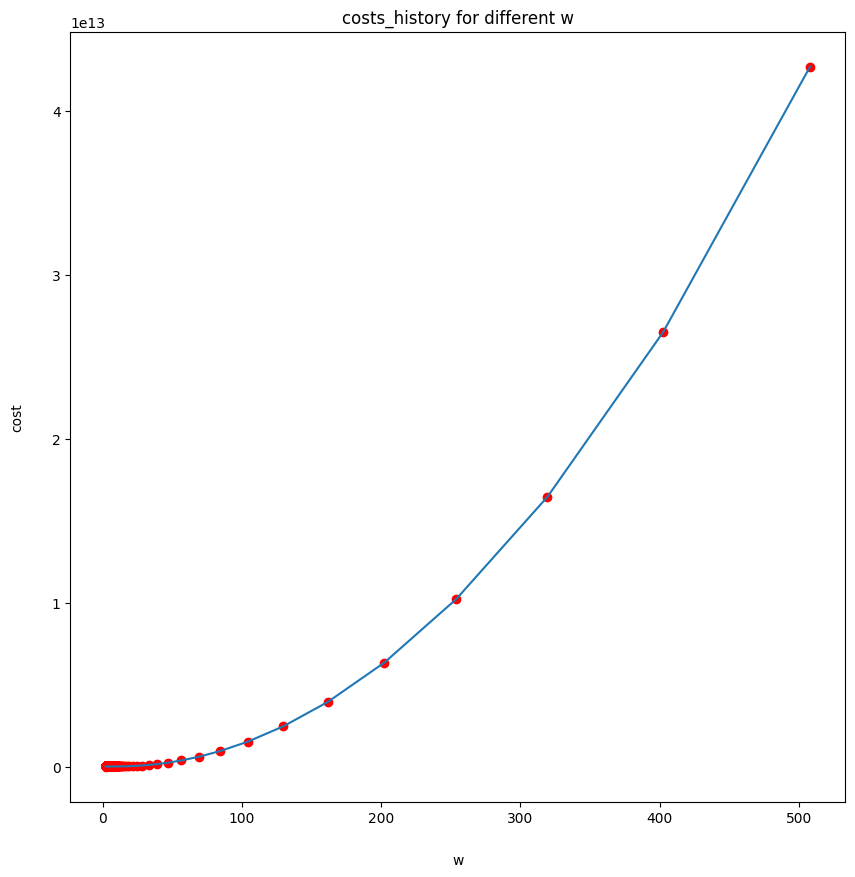

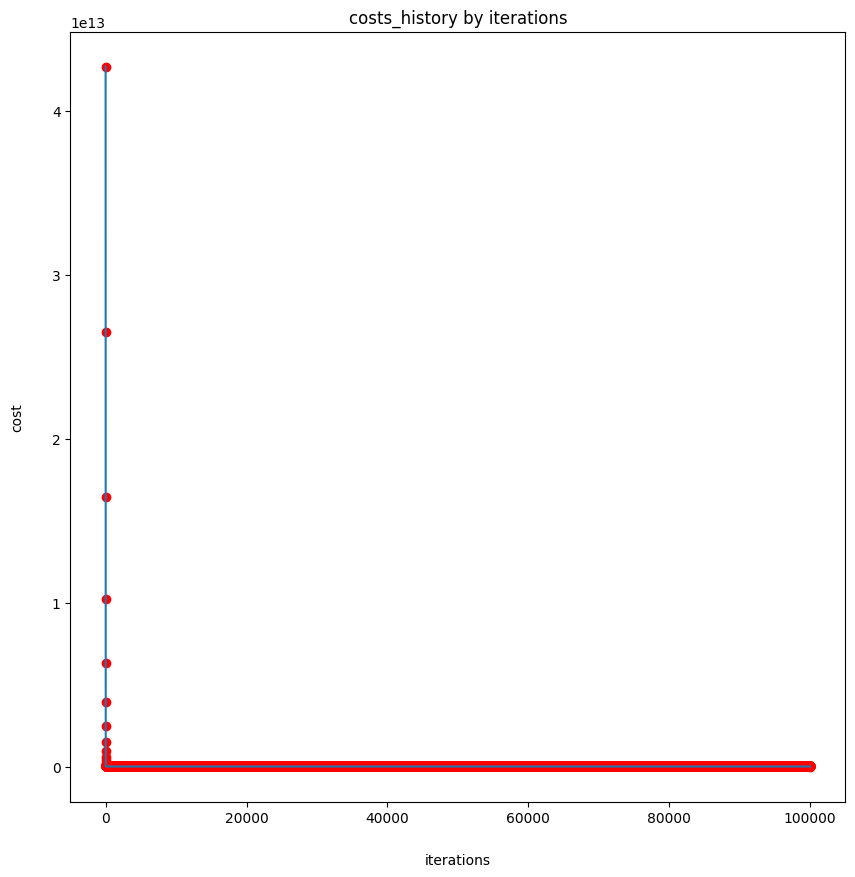

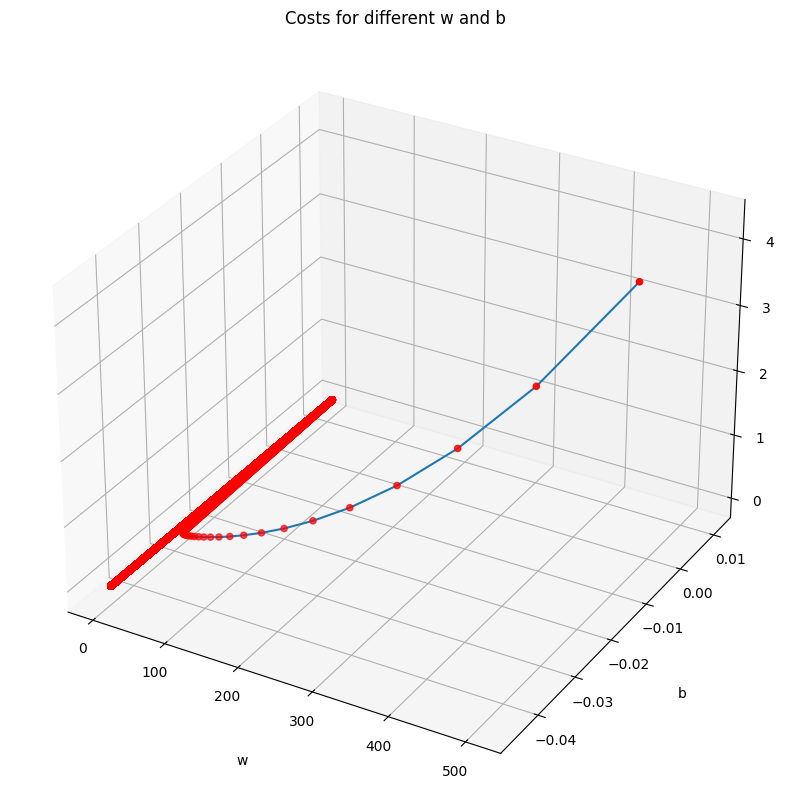

In [100]:
plot_gradient_descent(w1_history, b_history, costs_history)

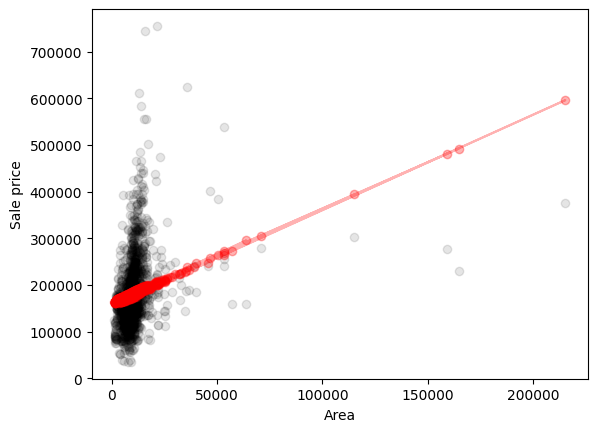

In [101]:
outputs = calculate_model_output(w, b, X)

plt.scatter(df["LotArea"], df["SalePrice"], color="black", alpha=0.1)
plt.plot(df["LotArea"], outputs, color="red", marker="o", alpha=0.3)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()


# Feature Scaling

Feature scaling is crucial in machine learning for several reasons. Features often have different scales. For instance, one feature might range from 1 to 100 while another from 1 to 100,000. When training machine learning models, features with larger scales can dominate those with smaller scales, leading to biased model fitting. Feature scaling brings all features to a similar scale, preventing this dominance issue.

Also, since many machine learning algorithms use distance-based calculations, such as gradient descent in linear regression or K-nearest neighbors. Feature scaling ensures that these algorithms converge faster and perform better by making the optimization process smoother and preventing certain features from having undue influence.

Scaling features to a similar range will also make the coefficients of a model more interpretable. Without scaling, it's difficult to compare the importance of different features based solely on their coefficient magnitudes.

We can also mention that in some in some algorithms, especially those that involve matrix computations or gradients, having features on vastly different scales can lead to numerical instability. This instability can manifest as overflow or underflow issues, causing algorithms to fail or produce unreliable results.

In [110]:
def scaling(x):
    x_scaled = x/max(x)
    
    return x_scaled


def mean_normalization(x):
    x_normalized = (x - np.mean(x)) / (max(x) - min(x))
    
    return x_normalized


def variance(x):
    mean = np.mean(x)
    var = np.sum((x - mean)**2) / len(x)
    
    return var


def standard_deviation(x):
    std = np.sqrt(variance(x))
    
    return std


def z_score_normalization(x):
    mean = np.mean(x)
    x_normalized = (x - mean) / standard_deviation(x)
    
    return x_normalized


def normalize_df(df):
    df_norm = pd.DataFrame()
    for x in df:
        df_norm[x] = mean_normalization(df[x])
    
    return df_norm

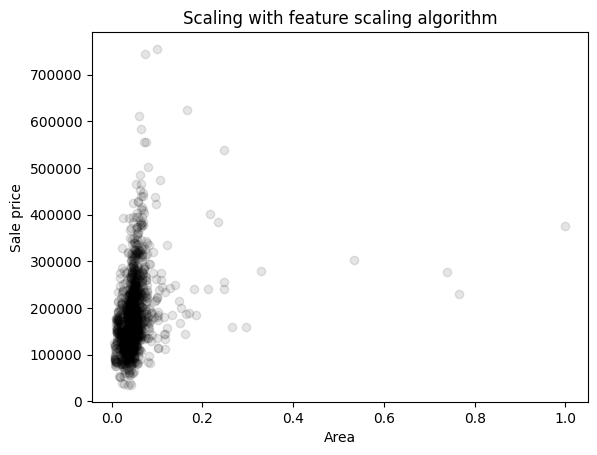

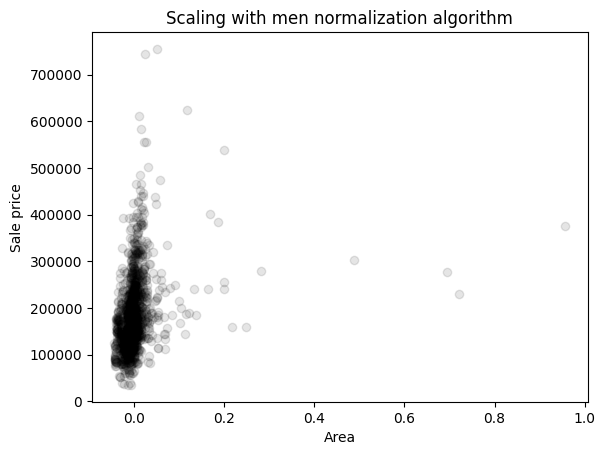

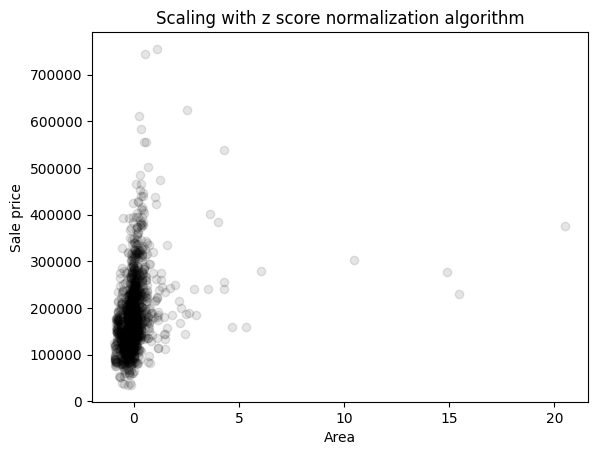

In [103]:
plt.scatter(scaling(df["LotArea"]), df["SalePrice"], color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.title("Scaling with feature scaling algorithm")
plt.show()

plt.scatter(mean_normalization(df["LotArea"]), df["SalePrice"], color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.title("Scaling with men normalization algorithm")
plt.show()

plt.scatter(z_score_normalization(df["LotArea"]), df["SalePrice"], color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.title("Scaling with z score normalization algorithm")
plt.show()

Let's try to run the gradient descent now that we can have better features

In [161]:
X_normalized = normalize_df(X)

w, b, w_history, b_history, costs_history = multiple_linear_regression(X_normalized, Y, lr=1e-2, iterations=1e5)

Iteration 10000: Cost 1158349386.914881, Weight [ 73022.95295036 301436.53478614  78824.67626353], Bias 180921.1958904095
Iteration 20000: Cost 1092315548.4430752, Weight [123000.90712898 353780.11034208  50157.33045801], Bias 180921.1958904095
Iteration 30000: Cost 1074810438.9585161, Weight [161529.98347859 366632.42209938  42684.07683356], Bias 180921.1958904095
Iteration 40000: Cost 1065285157.737431, Weight [192145.97858498 369076.98605218  41029.26220951], Bias 180921.1958904095
Iteration 50000: Cost 1059213977.4313446, Weight [216733.21152147 368893.87571442  40884.28160539], Bias 180921.1958904095
Iteration 60000: Cost 1055265674.4677137, Weight [236550.43982127 368159.47602915  41091.13583693], Bias 180921.1958904095
Iteration 70000: Cost 1052692002.1947037, Weight [252542.63643688 367406.96766382  41346.24828742], Bias 180921.1958904095
Iteration 80000: Cost 1051013931.6469171, Weight [265453.42461166 366755.95872536  41576.19883992], Bias 180921.1958904095
Iteration 90000: C

The cost got mutch lower with this statistical trick. From almost 3x10^9 to around 1x10^9

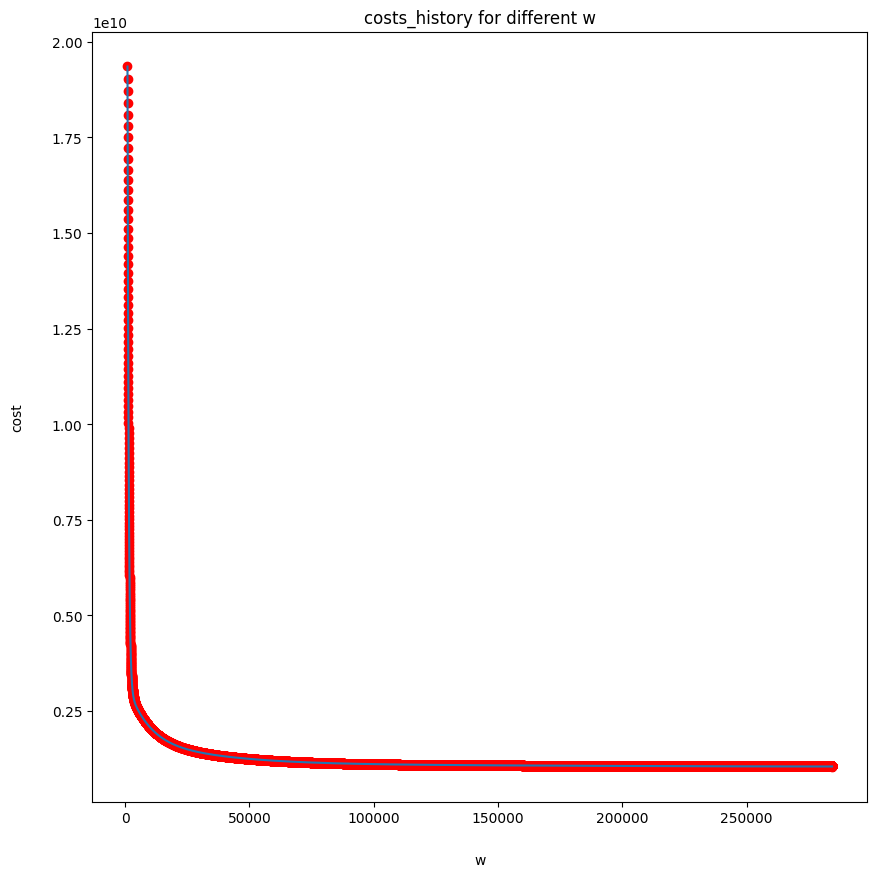

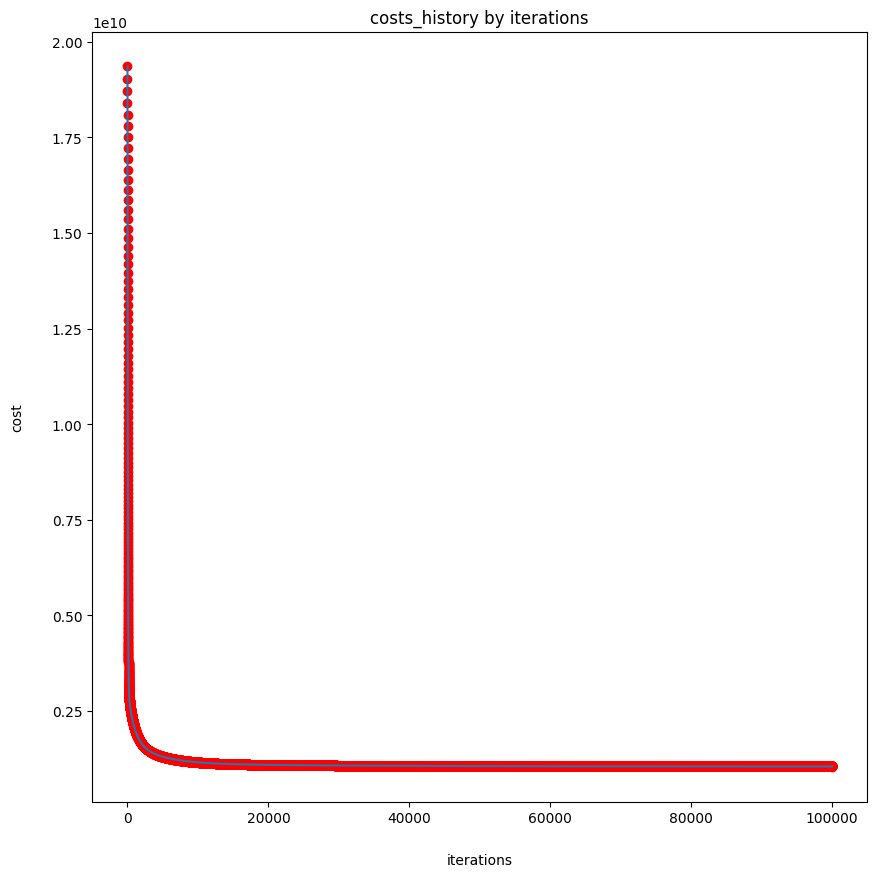

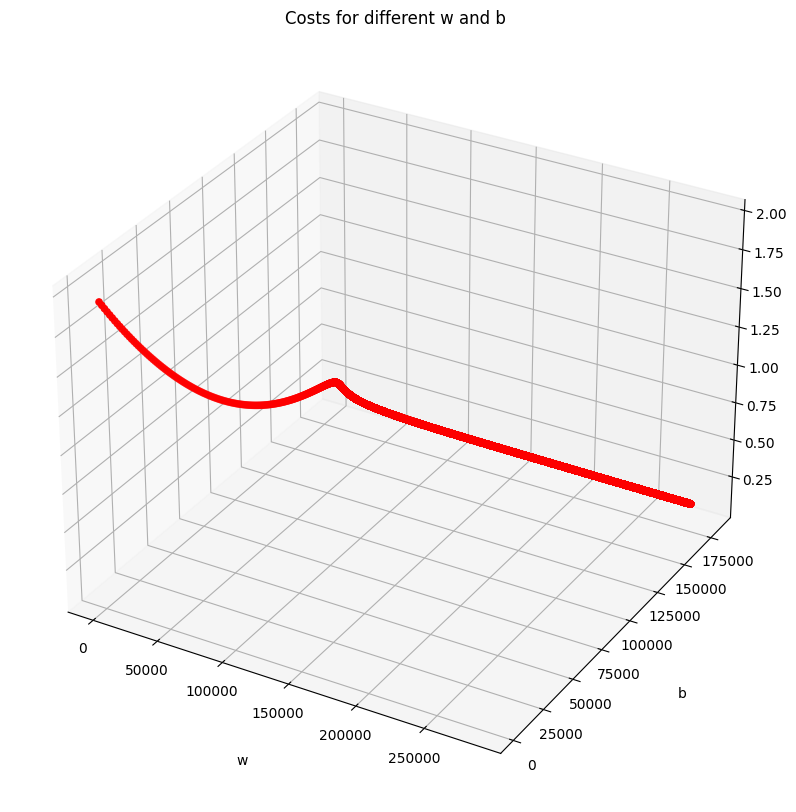

In [162]:
w1_history = [w[0] for w in w_history]
w2_history = [w[1] for w in w_history]
w3_history = [w[2] for w in w_history]

plot_gradient_descent(w1_history, b_history, costs_history)

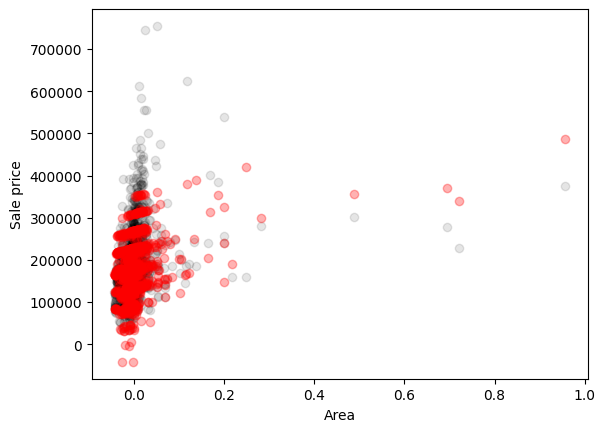

In [163]:
outputs = calculate_model_output(w, b, X_normalized)

plt.scatter(X_normalized["LotArea"], Y, color="black", alpha=0.1)
plt.scatter(X_normalized["LotArea"], outputs, color="red", marker="o", alpha=0.3)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()